# 4.10 Coding Etiquette & Excel Reporting

## Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a path

path = r'C:\Users\Rich\Documents\Instacart Basket Analysis'

In [3]:
# Import customers_merged_2.pkl file

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customers_merged_2.pkl'))

In [4]:
df.shape

(32434212, 27)

In [5]:
df.head()

,product_id,product_name,department_id,prices,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,average_price,spending_flag,order_frequency_flag,Gender,State,Age,Date_Joined,n_dependants,Family Status,Income
0,1,Chocolate Sandwich Cookies,19,5.8,138,28,6,11,3.0,5,...,6.94,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,19,5.8,138,30,6,17,20.0,1,...,6.94,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,12,20.0,138,1,5,13,NaN,4,...,6.94,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,12,20.0,138,10,5,14,6.0,1,...,6.94,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,10,12.9,138,9,6,12,7.0,5,...,6.94,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   department_id           int64  
 3   prices                  float64
 4   user_id                 object 
 5   order_number            int64  
 6   order_dow               int64  
 7   order_hour_of_day       int64  
 8   days_since_prior_order  float64
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  price_range_loc         object 
 12  busiest_day             object 
 13  busiest_days            object 
 14  busiest_period_of_day   object 
 15  max_order               int64  
 16  loyalty_flag            object 
 17  average_price           float64
 18  spending_flag           object 
 19  order_frequency_flag    object 
 20  Gender                  object 
 21  State                   objec

## Step 2: Checking for data security

To make my file smaller and easier to merge, I removed the first_name and last_name columns. This helps with data secutity and applies to PII.

## Step 3: Create regions by state

In [7]:
# States categorized by region according to 'List of regions of the United States' wikipedia entry
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# Use the loc function to determine the region for each row in df. 
df.loc[df['State'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['State'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['State'].isin(south), 'region'] = 'South'
df.loc[df['State'].isin(west), 'region'] = 'West'

In [9]:
# Check the 'region' column for results

df['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [10]:
#Comparison of spending between regions
# create a crosstab between region and spending_flag columns
crosstab_region_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [11]:
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,156308,7447502
Northeast,108363,5619984
South,210508,10591102
West,160931,8139514


Customer size by Region:

Midwest    156,308 + 7,447,502 = 7,603,810

Northeast  108,363 + 5,619,984 = 5,728,347

South      210,508 + 10,591,102 = 10,801,610

West       160,931 + 8,139,514 = 8,300,445


High spenders by Region:

Midwest    156,308 / 7,603,810 = 20.56% high spenders

Northeast  108,363 / 5,728,347 = 18.92% high spenders

South      210,508 / 10,801,610 = 19.49% high spenders

West       160,931 / 8,300,445 = 19.39% high spenders

CONCLUSION #1: Each region has approximately 20% of it's customers in the high spenders category.

CONCLUSION #2: The South has the greatest quantity of high spenders.

CONCLUSION #3: The Midwest has the highest percentage of high spenders.

CONCLUSION #4: The Northeast has the fewest number of high spenders.

CONCLUSION #5: The Northeast has the lowest percentage of high spenders.

## Step 4: Create exclusion flag for low activity customers

In [12]:
# create a crosstab between region and spending_flag columns

crosstab_region_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [13]:
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,156308,7447502
Northeast,108363,5619984
South,210508,10591102
West,160931,8139514


In [14]:
# Create an exclusion flag for low-activity customers with >=5 total orders.
# The 'max_order' column contains the max total orders for that user

df.loc[df['max_order'] >= 5,'fewer_than_five'] = 'Five or more Customer'

In [15]:
# Create an exclusion flag for low-activity customers with <5 total orders.
# The 'max_order' column contains the max total orders for that user

df.loc[df['max_order'] < 5,'fewer_than_five'] = 'Fewer than five Customer'

In [16]:
df['fewer_than_five'].value_counts(dropna = False)

Five or more Customer       30992664
Fewer than five Customer     1441548
Name: fewer_than_five, dtype: int64

In [17]:
#create high order customer subset
df_five_or_more= df[df['fewer_than_five'] == 'Five or more Customer']

In [18]:
#export high order customers 
df_five_or_more.to_pickle(r'/Users/Rich/Documents/Instacart Basket Analysis/02 Data/Prepared Data/high_order_customers.pkl')

## Step 5: Create customer profiles


In [19]:
#Age profile
#Check the descriptive statistics for age variable
df_five_or_more['Age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

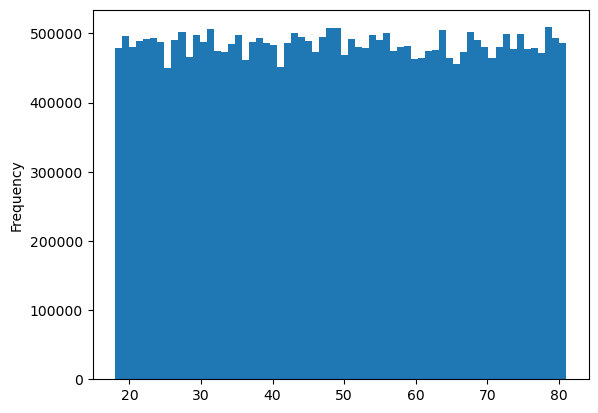

In [20]:
#Create a histogram of customer age
df_five_or_more['Age'].plot.hist(bins = 64)

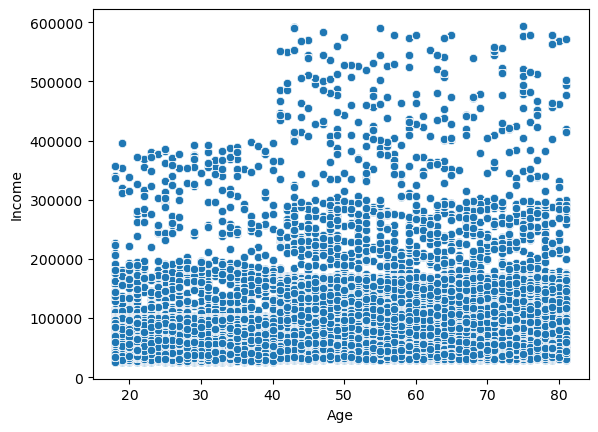

In [21]:
#recreating a scatterplot to show income range by age (with low-activity customers removed)
splot = sns.scatterplot(x = 'Age', y = 'Income',data = df_five_or_more)

There is a noticeable difference shoppers below 40 and shoppers older than 40. We will create three age-group classifications to track this. 

Young adults <40, Middle-age adults 40 - 64, and Senior >=65

In [22]:
# Create age_group classification - using df to add new columns, will subset to new df_users after all columns have been created
df_five_or_more.loc[(df_five_or_more['Age'] <  40), 'age_group'] = 'Young Adult'
df_five_or_more.loc[(df_five_or_more['Age'] >= 40) & (df['Age'] < 65), 'age_group'] = 'Middle-Aged'
df_five_or_more.loc[(df_five_or_more['Age'] >= 65), 'age_group'] = 'Senior'

C:\Users\Rich\AppData\Local\Temp\ipykernel_12816\863235996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_five_or_more.loc[(df_five_or_more['Age'] <  40), 'age_group'] = 'Young Adult'


In [23]:
df_five_or_more.shape

(30992664, 30)

In [24]:
#Checking entries of age_group column - by amount of products ordered
df_five_or_more['age_group'].value_counts(dropna = False).sort_index()

Middle-Aged    12115268
Senior          8202746
Young Adult    10674650
Name: age_group, dtype: int64

In [25]:
#Income profile
#Check the descriptive statistics for the income variable
df_five_or_more['Income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: Income, dtype: float64

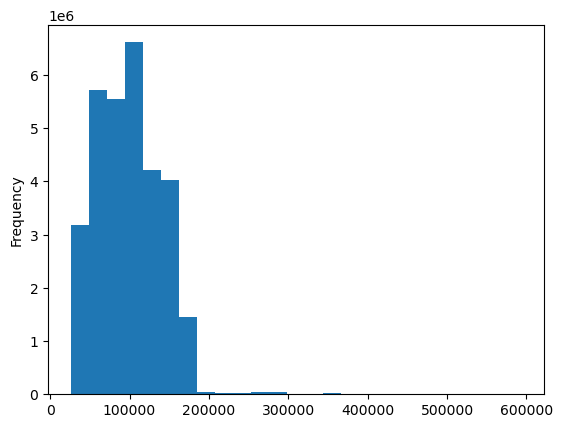

In [26]:
#Create a histogram of customer income
hist_cust_income = df_five_or_more['Income'].plot.hist(bins = 25)

Conclusion: The majority of the data is between the income of 25k - 175k annual income.

Analysis: I'd like to spit the data into three groups... One group is less than 75k annual income. Group two is between 75k and 125k annual income. Group three makes more than 125k.

In [27]:
# Create income_group classification
df_five_or_more.loc[(df_five_or_more['Income'] < 75000), 'income_group'] = '025-75k'
df_five_or_more.loc[(df_five_or_more['Income'] >= 75000) & (df_five_or_more['Income'] < 125000), 'income_group'] = '075-125k'
df_five_or_more.loc[(df_five_or_more['Income'] >= 125000), 'income_group'] = '125k+'

C:\Users\Rich\AppData\Local\Temp\ipykernel_12816\3126526029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_five_or_more.loc[(df_five_or_more['Income'] < 75000), 'income_group'] = '025-75k'


In [28]:
# Check the 'income_group' counts by number of items ordered
df_five_or_more['income_group'].value_counts(dropna = False)

075-125k    12791163
025-75k      9916284
125k+        8285217
Name: income_group, dtype: int64

In [29]:
df_five_or_more.shape

(30992664, 31)

In [30]:
df_five_or_more.rename (columns = {'n_dependants':'number_of_dependants'}, inplace = True)

C:\Users\Rich\AppData\Local\Temp\ipykernel_12816\3878828732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_five_or_more.rename (columns = {'n_dependants':'number_of_dependants'}, inplace = True)


In [31]:
#Statistics for number of dependants profile
df_five_or_more['number_of_dependants'].describe()

count    3.099266e+07
mean     1.501798e+00
std      1.118902e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

<Axes: ylabel='Frequency'>

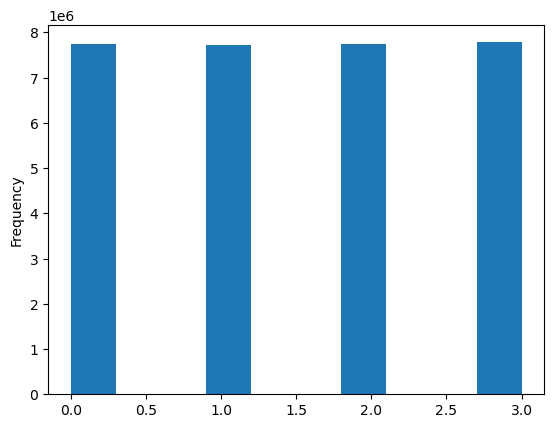

In [32]:
#Create a histogram of number of dependants
df_five_or_more['number_of_dependants'].plot.hist(bins = 10)

In [33]:
df_five_or_more.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30992664 entries, 0 to 32434200
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   department_id           int64  
 3   prices                  float64
 4   user_id                 object 
 5   order_number            int64  
 6   order_dow               int64  
 7   order_hour_of_day       int64  
 8   days_since_prior_order  float64
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  price_range_loc         object 
 12  busiest_day             object 
 13  busiest_days            object 
 14  busiest_period_of_day   object 
 15  max_order               int64  
 16  loyalty_flag            object 
 17  average_price           float64
 18  spending_flag           object 
 19  order_frequency_flag    object 
 20  Gender                  object 
 21  State                   objec

In [34]:
df_five_or_more.rename (columns = {'Family Status':'family_status'}, inplace = True)

C:\Users\Rich\AppData\Local\Temp\ipykernel_12816\3555555848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_five_or_more.rename (columns = {'Family Status':'family_status'}, inplace = True)


In [35]:
df_five_or_more.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30992664 entries, 0 to 32434200
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   department_id           int64  
 3   prices                  float64
 4   user_id                 object 
 5   order_number            int64  
 6   order_dow               int64  
 7   order_hour_of_day       int64  
 8   days_since_prior_order  float64
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  price_range_loc         object 
 12  busiest_day             object 
 13  busiest_days            object 
 14  busiest_period_of_day   object 
 15  max_order               int64  
 16  loyalty_flag            object 
 17  average_price           float64
 18  spending_flag           object 
 19  order_frequency_flag    object 
 20  Gender                  object 
 21  State                   objec

In [36]:
#Create a crosstab between number_dependants and family_status
family_crosstab = pd.crosstab(df_five_or_more['family_status'], df_five_or_more['number_of_dependants'], dropna = False)

In [37]:
family_crosstab

number_of_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2647761,0,0,0
living with parents and siblings,0,508439,485157,489015
married,0,7217542,7255042,7290437
single,5099271,0,0,0


OBSERVATION: Divorced, Widowed and Single family staus have zero dependants.

OBSERVATION: Married and Living with parents and siblings do not have zero dependants.

In [38]:
# Create a family_status classification
df_five_or_more.loc[(df_five_or_more['number_of_dependants'] == 0), 'dependants'] = 'No dependants'
df_five_or_more.loc[(df_five_or_more['number_of_dependants'] >= 1), 'dependants'] = 'Have dependants'

C:\Users\Rich\AppData\Local\Temp\ipykernel_12816\303865967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_five_or_more.loc[(df_five_or_more['number_of_dependants'] == 0), 'dependants'] = 'No dependants'


In [39]:
# Check the 'dependants' counts by the number of items ordered
df_five_or_more['dependants'].value_counts(dropna = False)

Have dependants    23245632
No dependants       7747032
Name: dependants, dtype: int64

In [40]:
df_five_or_more.shape

(30992664, 32)

In [41]:
# Creating a crosstab between department_id and user_id

dep_user_cross = pd.crosstab(df_five_or_more['department_id'], df_five_or_more['user_id'], dropna = False)

In [42]:
# Assign nutrition flags to users and storing them in a Python dictionary

vegan_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:   # the index starts at 0, so index 0 corresponds to dep_id=1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [43]:
# Assigning user flags to the vegan_flag

vegan_flag = []
for user in df_five_or_more['user_id']:
    vegan_flag.append(vegan_dict[user])

In [44]:
# Adding vegan_flag to df as vegan_profile

df_five_or_more['vegan_profile'] = vegan_flag

C:\Users\Rich\AppData\Local\Temp\ipykernel_12816\2841990883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_five_or_more['vegan_profile'] = vegan_flag


In [45]:
# Checking frequency distribution for vegan_profile

df_five_or_more['vegan_profile'].value_counts(dropna = False)

Non-vegan    30682934
Vegan          309730
Name: vegan_profile, dtype: int64

In [46]:
# Assigning pet flags to users and storing it in a dictionary

pet_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[7] == 0 :      # the index starts at 0, so index 0 corresponds to dep_id=1
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Pet owner'

In [47]:
# Assigning user flags to the pet_flag

pet_flag = []
for user in df_five_or_more['user_id']:
    pet_flag.append(pet_dict[user])

In [48]:
# Adding pet_flag column to as pet_profile

df_five_or_more['pet_profile'] = pet_flag

C:\Users\Rich\AppData\Local\Temp\ipykernel_12816\3123285075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_five_or_more['pet_profile'] = pet_flag


In [49]:
# Checking frequency distribution for pet_profile

df_five_or_more['pet_profile'].value_counts(dropna = False)

No pet       27539023
Pet owner     3453641
Name: pet_profile, dtype: int64

In [50]:
#Export df_five_or_more in .pkl format
df_five_or_more.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data_for_five_or_more_customers.pkl'))

# Step 6. Create an appropriate vizualization to show the distribution of profiles.

In [51]:
# Create a path

viz_path = r'C:\Users\Rich\Documents\Instacart Basket Analysis\04 Analysis\Visualizations'

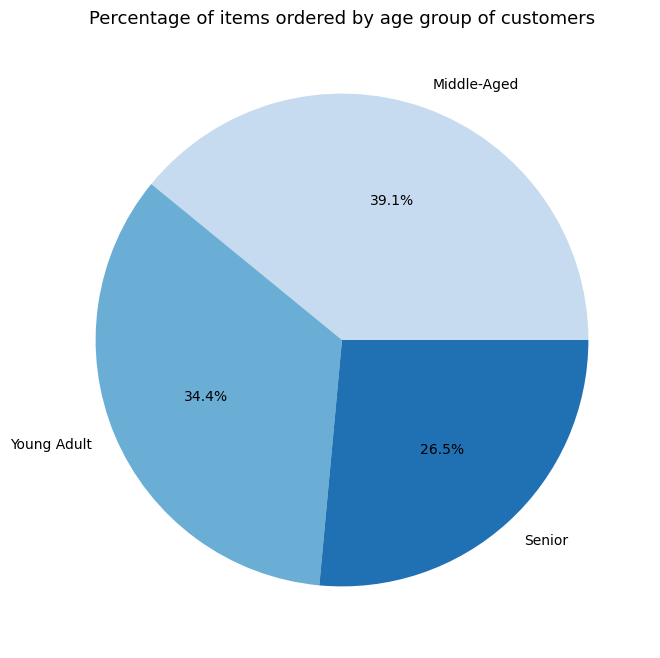

In [52]:
#Pie chart of percentage of items ordered by age group
pie_orders_age = df_five_or_more['age_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by age group of customers',fontsize=13)
plt.show()

In [53]:
pie_orders_age.figure.savefig(os.path.join(viz_path, 'pie_orders_age'))

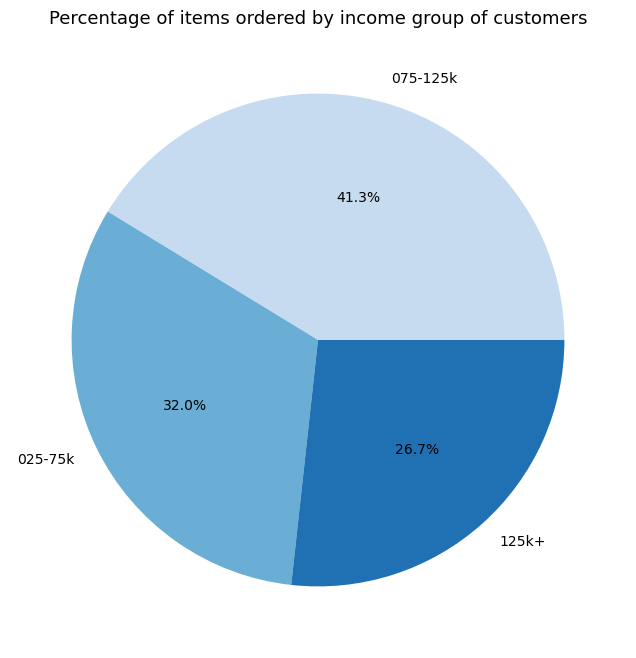

In [54]:
#Pie chart of percentage of items ordered by income group
pie_orders_income = df_five_or_more['income_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by income group of customers',fontsize=13)
plt.show()

In [55]:
pie_orders_income.figure.savefig(os.path.join(viz_path, 'pie_orders_income'))

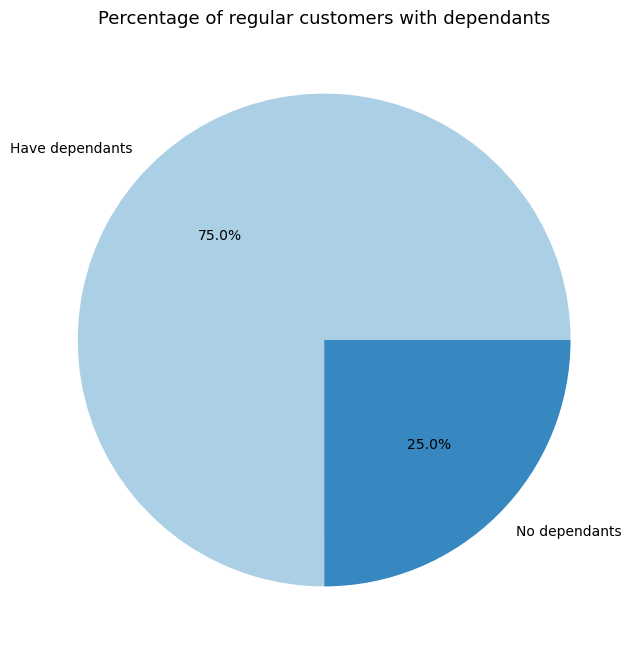

In [56]:
#Pie chart of customer with dependants
pie_user_dependants = df_five_or_more['dependants'].value_counts().plot.pie(figsize = (8,8), 
                                                                        colors = sns.color_palette('Blues', 2), 
                                                                        autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers with dependants',fontsize=13)
plt.show()

In [57]:
pie_user_dependants.figure.savefig(os.path.join(viz_path, 'pie_user_dependants'))

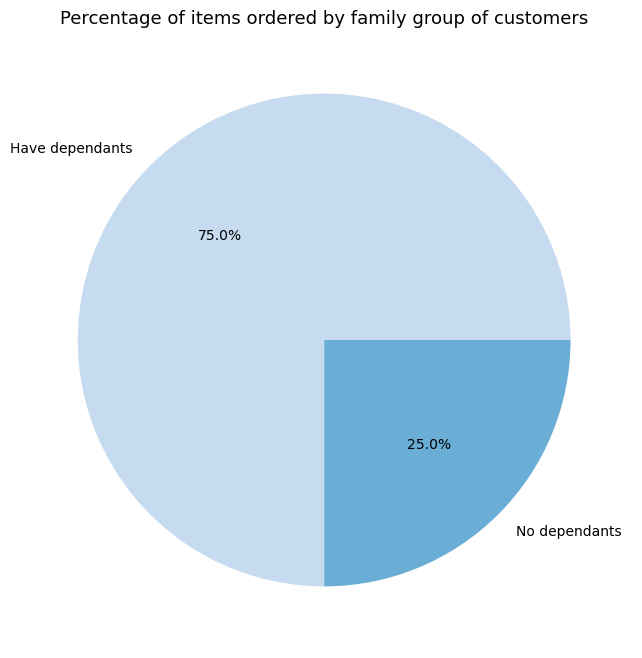

In [58]:
#Pie chart of percentage of items ordered by family group
pie_orders_family = df_five_or_more['dependants'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by family group of customers',fontsize=13)
plt.show()

In [59]:
pie_orders_family.figure.savefig(os.path.join(viz_path, 'pie_orders_family'))

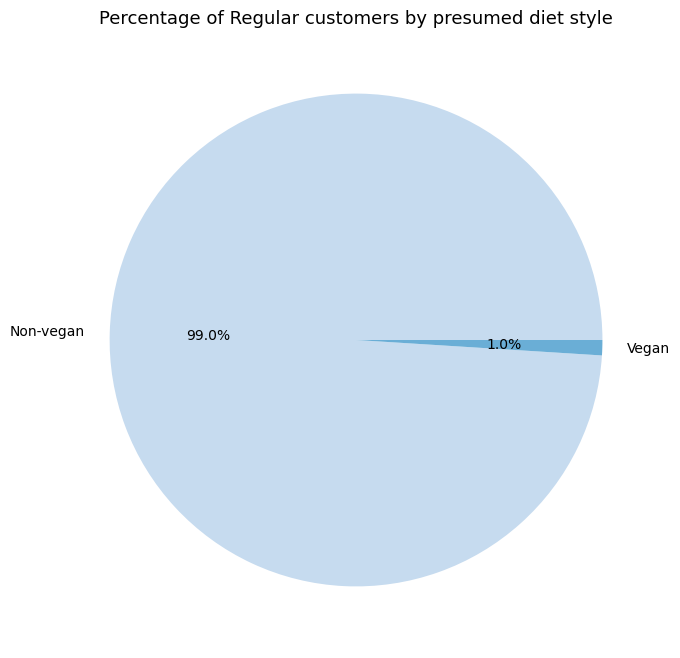

In [60]:
#Pie chart of customer's diet style based on previous buying history
pie_user_vegan = df_five_or_more['vegan_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                                  colors = sns.color_palette('Blues', 3), 
                                                                  autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Regular customers by presumed diet style',fontsize=13)
plt.show()

In [61]:
pie_user_vegan.figure.savefig(os.path.join(viz_path, 'pie_user_vegan'))

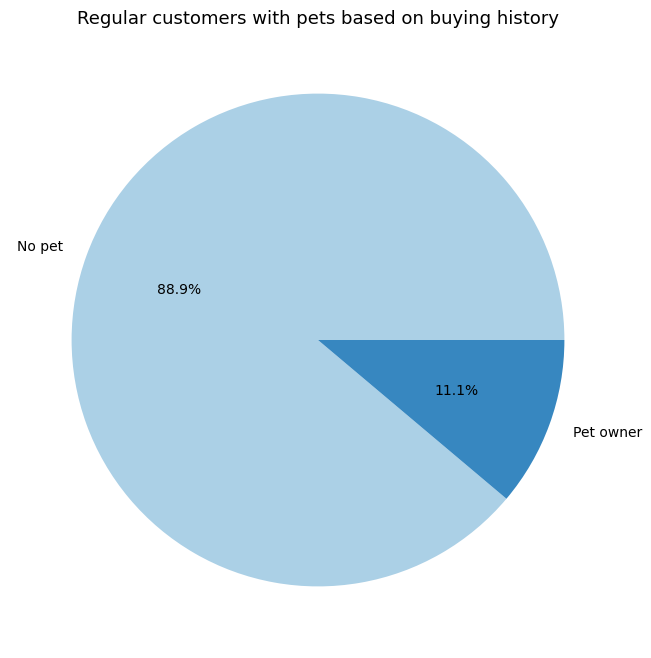

In [62]:
#Pie chart of customer's pet ownership based on previous buying history
pie_user_pet = df_five_or_more['pet_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = sns.color_palette('Blues', 2), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Regular customers with pets based on buying history',fontsize=13)
plt.show()

In [63]:
pie_user_pet.figure.savefig(os.path.join(viz_path, 'pie_user_pet'))

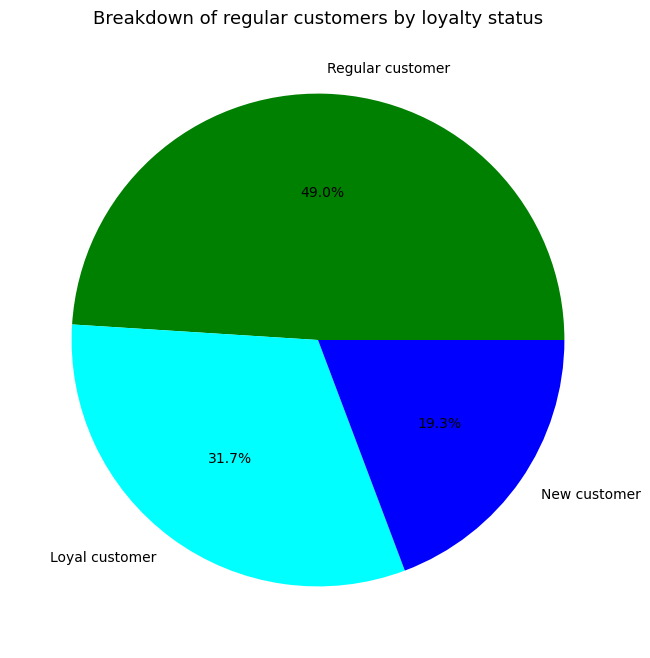

In [64]:
#Pie chart of customers by loyalty flag
pie_user_loyal = df['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = ('Green', 'Cyan', 'Blue'), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of regular customers by loyalty status',fontsize=13)
plt.show()

In [65]:
pie_user_loyal.figure.savefig(os.path.join(viz_path, 'pie_user_loyal'))

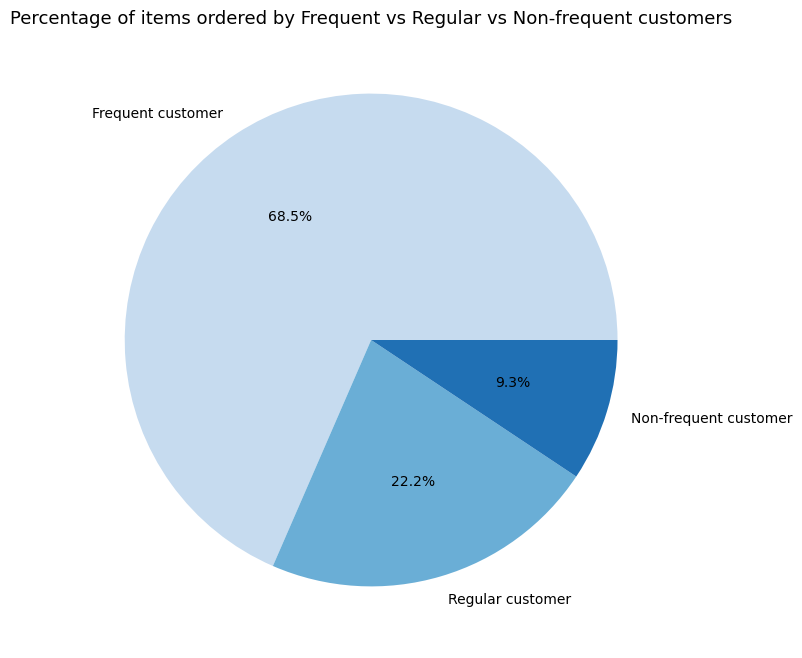

In [66]:
#Pie chart of percentage of items ordered by order_frequency_flag 
pie_orders_freq = df_five_or_more['order_frequency_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by Frequent vs Regular vs Non-frequent customers',fontsize=13)
plt.show()

In [67]:
pie_orders_freq.figure.savefig(os.path.join(viz_path, 'pie_orders_freq'))

# Step 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [68]:
# Usage frequency and expenditure by Age groups
cross_age_orderhabits = df_five_or_more.groupby('age_group').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_prior_order': ['mean', 'min', 'max']})

In [69]:
# Usage frequency and expenditure by Income groups
cross_income_orderhabits = df_five_or_more.groupby('income_group').agg({'prices': ['mean', 'min', 'max'], 
                                                                    'days_since_prior_order': ['mean', 'min', 'max']})

In [70]:
# Usage frequency and expenditure by customers with dependants and without
cross_family_orderhabits = df_five_or_more.groupby('dependants').agg({'prices': ['mean', 'min', 'max'], 
                                                                  'days_since_prior_order': ['mean', 'min', 'max']})

In [71]:
# Usage frequency and expenditure by customers grouped by diet
cross_diet_orderhabits = df_five_or_more.groupby('vegan_profile').agg({'prices': ['mean', 'min', 'max'], 
                                                                'days_since_prior_order': ['mean', 'min', 'max']})

In [72]:
# Usage freq. and expenditure by customers grouped by pet ownership
cross_pet_orderhabits = df_five_or_more.groupby('pet_profile').agg({'prices': ['mean', 'min', 'max'], 
                                                            'days_since_prior_order': ['mean', 'min', 'max']})

# Step 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

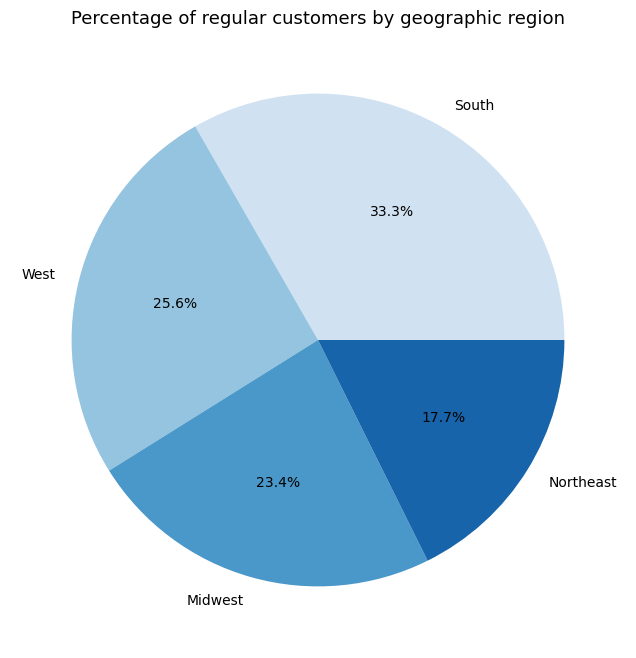

In [73]:
#Pie chart of percentage of regular customers in each region
pie_user_region = df['region'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('Blues', 4), autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers by geographic region',fontsize=13)
plt.show()

In [74]:
pie_user_region.figure.savefig(os.path.join(viz_path, 'pie_user_region'))

In [75]:
# Do customers in different regions order at different rates?
#crosstab region and order_frequency flag - normalized
crosstab_regional_freq_n = pd.crosstab(index = df_five_or_more['region'], 
                                         columns = df_five_or_more['order_frequency_flag'], 
                                         normalize = 'index')

In [76]:
#second crosstab to put labels on chart
crosstab_regional_freq_2 = pd.crosstab(index = df_five_or_more['region'], 
                                         columns = df_five_or_more['order_frequency_flag'])

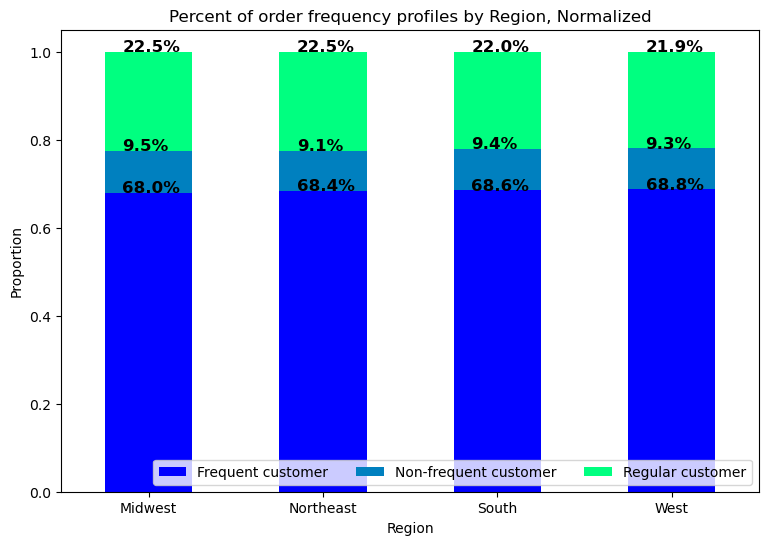

In [77]:
#Regional distribution of frequent customer profiles
bar_norm_region_freq = crosstab_regional_freq_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'winter',
                                                       figsize = (9, 6))
 
plt.title('Percent of order frequency profiles by Region, Normalized')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_regional_freq_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_regional_freq_n.loc[x],
                                   crosstab_regional_freq_n.loc[x].cumsum()):
    
        plt.text(x= n -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [78]:
bar_norm_region_freq.figure.savefig(os.path.join(viz_path, 'bar_norm_region_freq'))

### Update department information

In [80]:
# Import department.csv file

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','departments.csv'),index_col = False)

In [81]:
#Transposing df_dep 
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [82]:
df_dep_t = df_dep.T

In [83]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [84]:
new_header = df_dep_t.iloc[0]

In [85]:
new_header

0    department
Name: department_id, dtype: object

In [86]:
df_dep_t_new = df_dep_t[1:]

In [87]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [88]:
df_dep_t_new.columns = new_header

In [89]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [90]:
data_dict = df_dep_t_new.to_dict('index')

In [91]:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [92]:
#export wrangled_departments.csv 
df_dep_t_new.to_csv(r'/Users/Rich/Documents/Instacart Basket Analysis/02 Data/Prepared Data/wrangled_departments.csv')

In [93]:
# Import wrangled_departments

df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','wrangled_departments.csv'))

In [94]:
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [95]:
df_departments.rename(columns = {'Unnamed: 0' : 'department_id'},inplace = True)

In [96]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [97]:
#Merge df_five_or_more and df_departments together
df_combo = df_five_or_more.merge(df_departments, on = 'department_id')

In [98]:
#Are departments more frequently ordered from in different regions? 
#crosstab region and departments - normalized
crosstab_dept_region_n = pd.crosstab(index = df_combo['department'], 
                                         columns = df_five_or_more['region'], 
                                         normalize = 'index')

In [99]:
#second crosstab to put labels on chart
crosstab_dept_region_2 = pd.crosstab(index = df_combo['department'], columns = df_combo['region'])

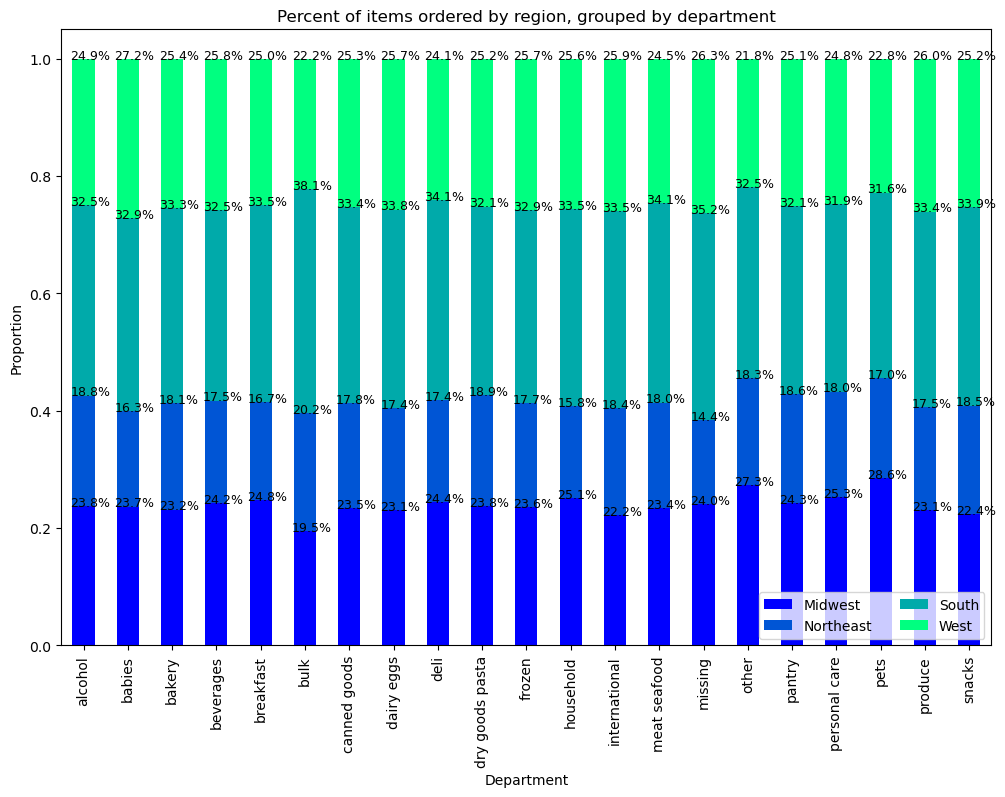

In [100]:
#Normalized bar chart of items ordered by region, grouped by department
bar_norm_dept_region = crosstab_dept_region_n.plot( kind ='bar',
                                                   stacked = True,
                                                   colormap = 'winter',
                                                   figsize = (12, 8)) 
plt.title('Percent of items ordered by region, grouped by department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_region_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_region_n.loc[x],
                                   crosstab_dept_region_n.loc[x].cumsum()):    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9)
plt.show()

In [101]:
#Top Departments by number of ordered products
df_combo['department'].value_counts(dropna = False)

produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

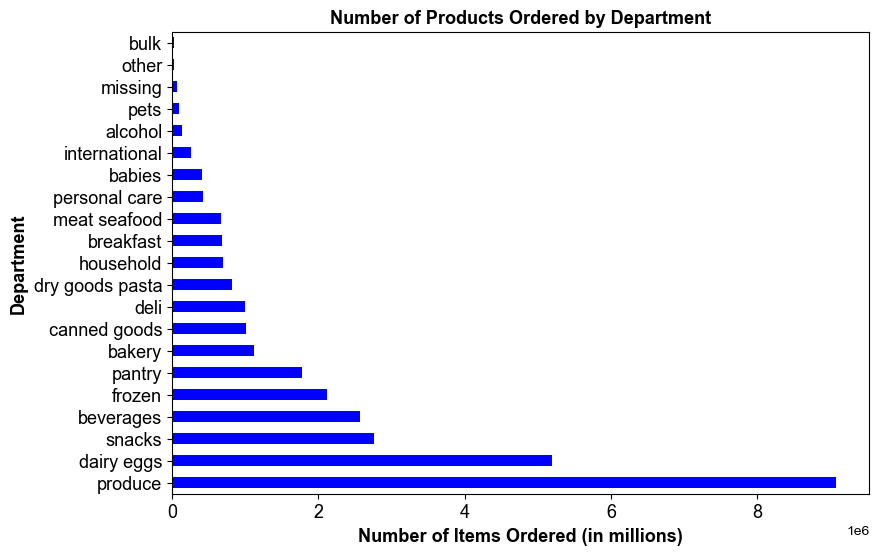

In [102]:
#Bar chart of departments by products ordered
bar_top_depts = df_combo['department'].value_counts().plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of Products Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

In [103]:
bar_top_depts.figure.savefig(os.path.join(viz_path, 'bar_top_depts'))

In [104]:
#average price per item sold by department
cross_dept_avgprice = df_combo.groupby('department').agg({'prices': ['mean']})

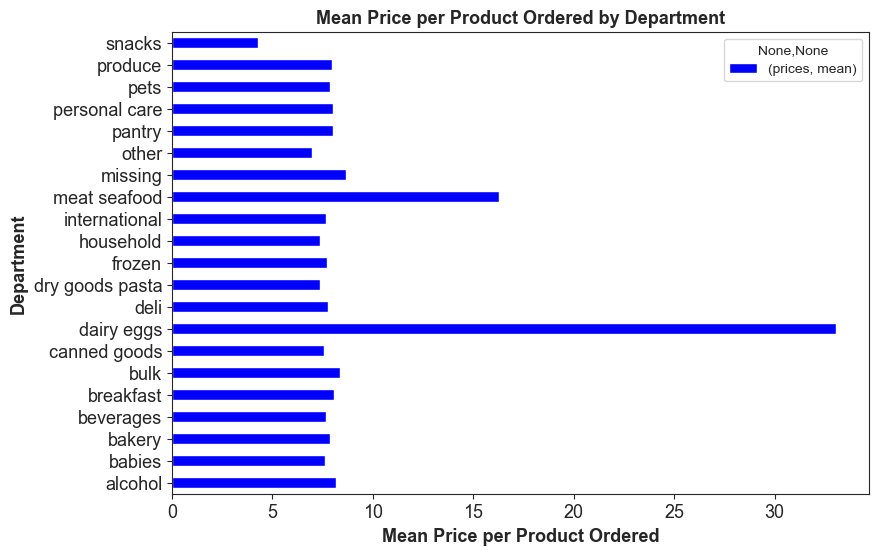

In [105]:
#Bar chart of average price per departments by products ordered
bar_dept_price = cross_dept_avgprice.plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Mean Price per Product Ordered', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Mean Price per Product Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

In [106]:
bar_dept_price.figure.savefig(os.path.join(viz_path, 'bar_dept_price'))

In [107]:
#Age profile
#crosstab department preferences and age groups  - normalized
crosstab_dept_age_n = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['age_group'], 
                                         normalize = 'index')

In [108]:
#second crosstab to put labels on chart
crosstab_dept_age_2 = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['age_group'])

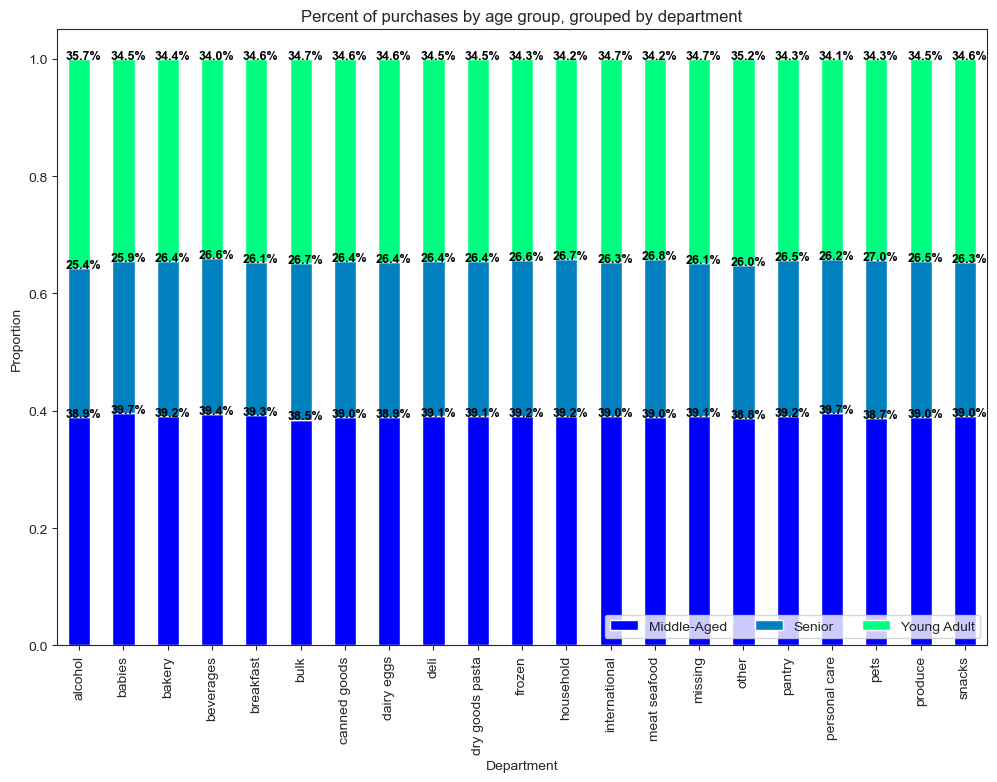

In [109]:
#Normalized bar chart of purchases by age group, grouped by department
bar_norm_dept_age = crosstab_dept_age_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent of purchases by age group, grouped by department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_age_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_age_n.loc[x],
                                   crosstab_dept_age_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [110]:
bar_norm_dept_age.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_age'))

In [111]:
#Income profile
#crosstab department preferences and income groups  - normalized
crosstab_dept_income_n = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['income_group'], 
                                         normalize = 'index')

In [112]:
#second crosstab to put labels on chart
crosstab_dept_income_2 = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['income_group'])

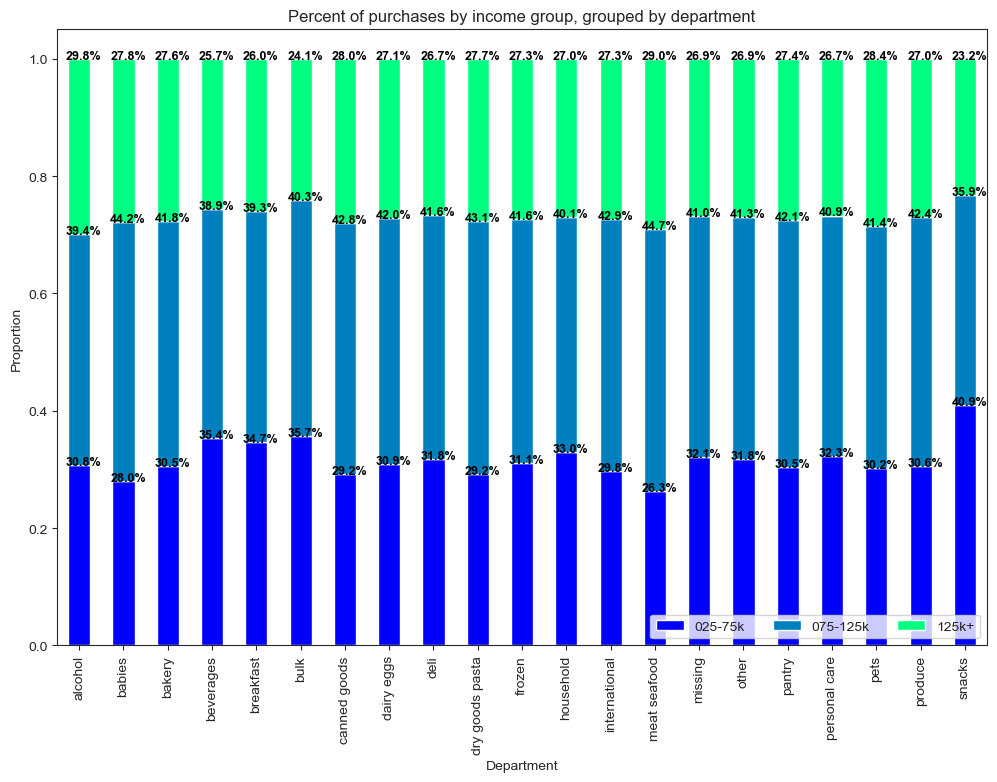

In [113]:
#Normalized bar chart of purchases by income group, grouped by department
bar_norm_dept_income = crosstab_dept_income_n.plot( kind ='bar',
                                                    stacked = True,
                                                    colormap = 'winter',
                                                    figsize = (12, 8))
 
plt.title('Percent of purchases by income group, grouped by department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_income_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_income_n.loc[x],
                                   crosstab_dept_income_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [114]:
bar_norm_dept_income.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_income'))

In [115]:
#Family/dependant profile
#crosstab department preferences and dependant status groups  - normalized
crosstab_dept_parent_n = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['dependants'], 
                                         normalize = 'index')

In [116]:
#second crosstab to put labels on chart
crosstab_dept_parent_2 = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['dependants'])

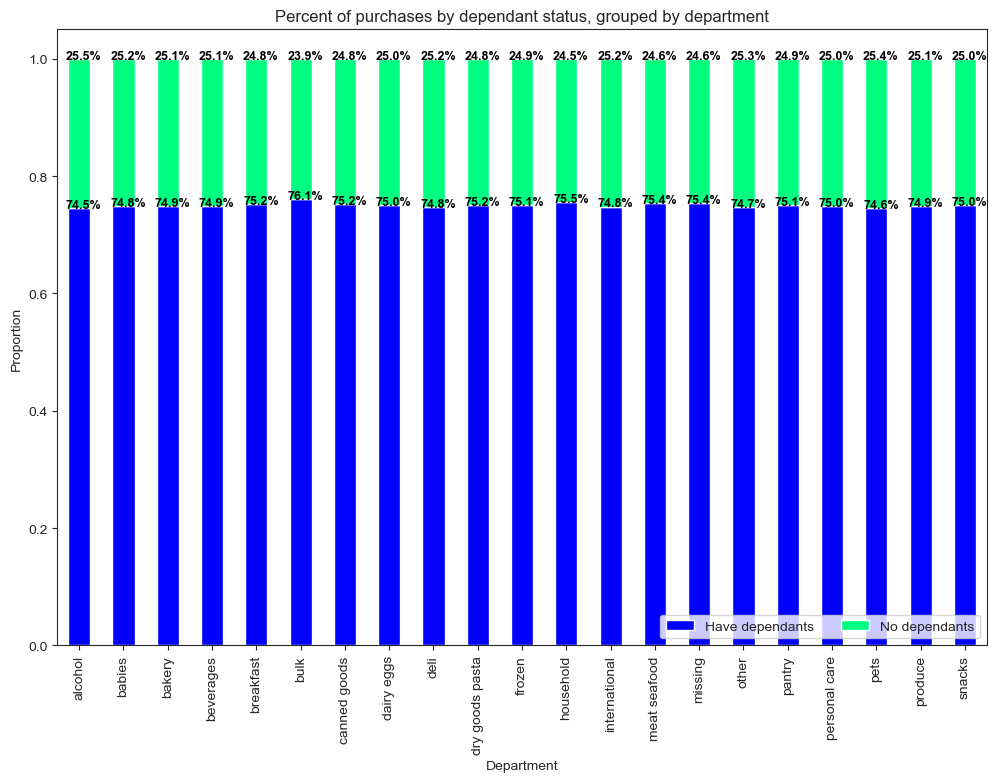

In [117]:
#Normalized bar chart of purchases by income group, grouped by department
bar_norm_dept_parent = crosstab_dept_parent_n.plot( kind ='bar',
                                                    stacked = True,
                                                    colormap = 'winter',
                                                    figsize = (12, 8))
 
plt.title('Percent of purchases by dependant status, grouped by department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_parent_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_parent_n.loc[x],
                                   crosstab_dept_parent_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [118]:
bar_norm_dept_parent.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_parent'))

In [119]:
#Diet profile
#crosstab department preferences and diet styles  - normalized
crosstab_dept_diet_n= pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['vegan_profile'], 
                                         normalize = 'index')

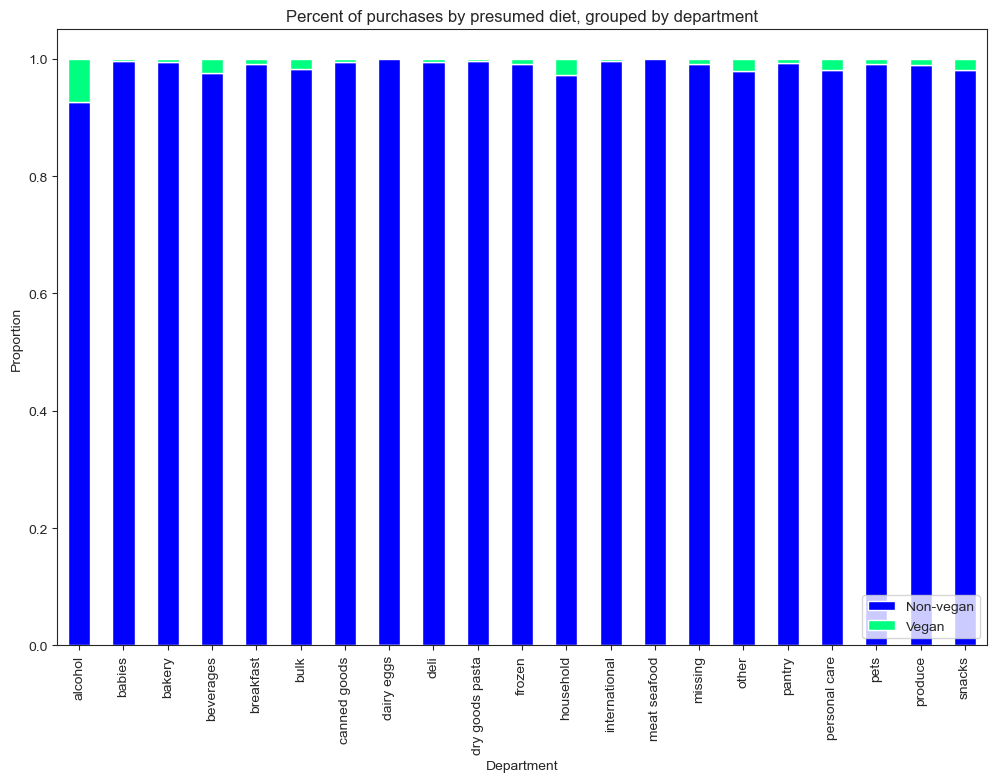

In [120]:
#Normalized bar chart of purchases by diet styles, grouped by department
bar_norm_dept_diet = crosstab_dept_diet_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent of purchases by presumed diet, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

plt.show()

In [121]:
bar_norm_dept_diet.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_diet'))

In [122]:
#Pet ownership profile
#crosstab department preferences and pet ownership  - normalized
crosstab_dept_pet_n= pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['pet_profile'], 
                                         normalize = 'index')

In [123]:
#second crosstab to put labels on chart
crosstab_dept_pet_2 = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['pet_profile'])

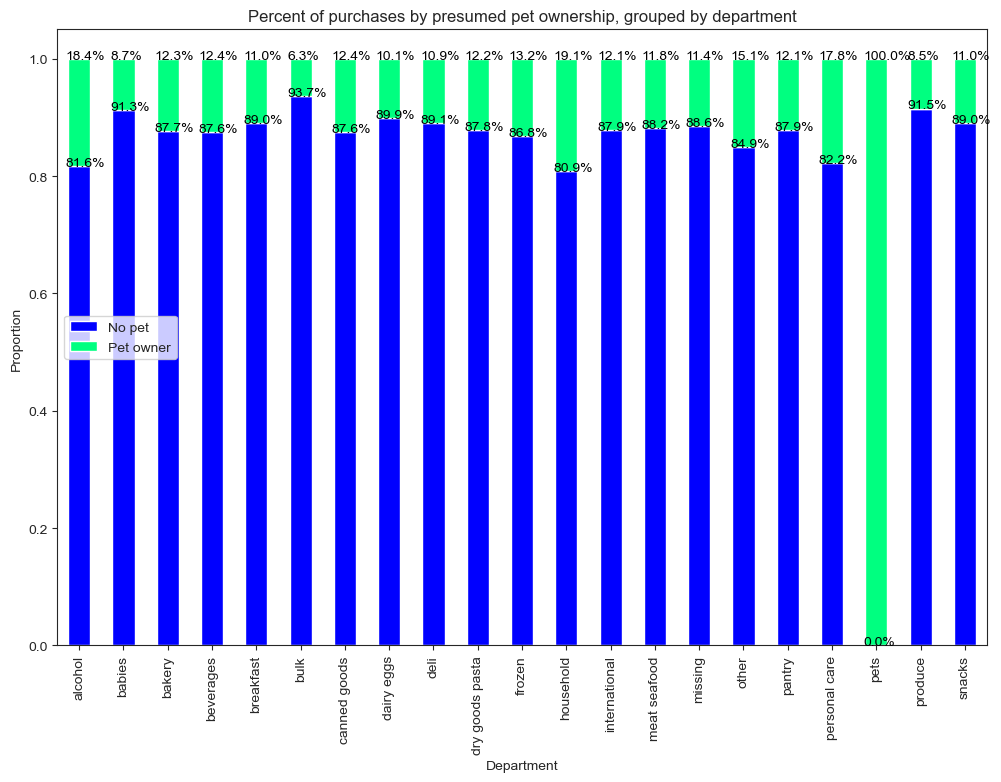

In [124]:
#Normalized bar chart of purchases by pet ownership, grouped by department
bar_norm_dept_pet = crosstab_dept_pet_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent of purchases by presumed pet ownership, grouped by department')
plt.legend(loc = 'center left', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_pet_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_pet_n.loc[x],
                                   crosstab_dept_pet_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10)
            #     fontweight = 'bold')

plt.show()

In [125]:
bar_norm_dept_pet.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_pet'))

In [126]:
#Order frequency profile
#crosstab department and order_frequency flag - normalized
crosstab_dept_freq_n = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['order_frequency_flag'], 
                                         normalize = 'index')

In [127]:
#second crosstab to put labels on chart
crosstab_dept_freq_2 = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['order_frequency_flag'])

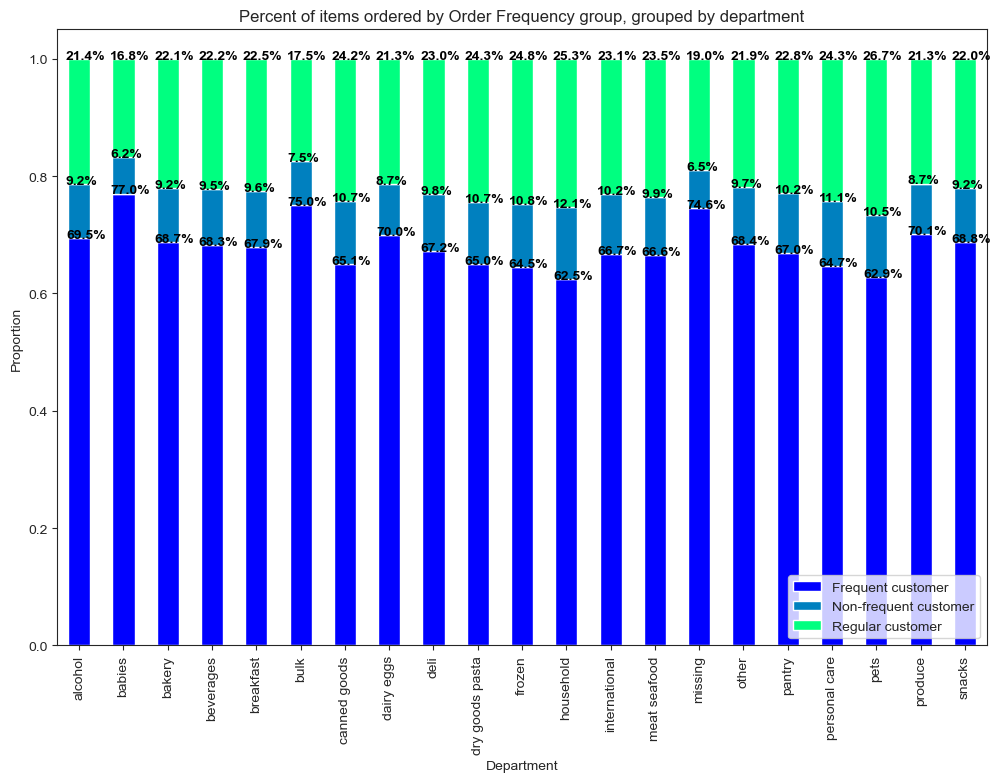

In [128]:
#Normalized bar chart of items ordered by order frquency group, grouped by department
bar_norm_dept_freq = crosstab_dept_freq_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent of items ordered by Order Frequency group, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_freq_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_freq_n.loc[x],
                                   crosstab_dept_freq_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()

In [129]:
bar_norm_dept_freq.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_freq'))

In [130]:
#Loyalty flag profile
#crosstab region and loyal customer flag - normalized
crosstab_dept_loyal_n = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['loyalty_flag'], 
                                         normalize = 'index')

In [131]:
#second crosstab to put labels on chart
crosstab_dept_loyal_2 = pd.crosstab(index = df_combo['department'], 
                                         columns = df_combo['loyalty_flag'])

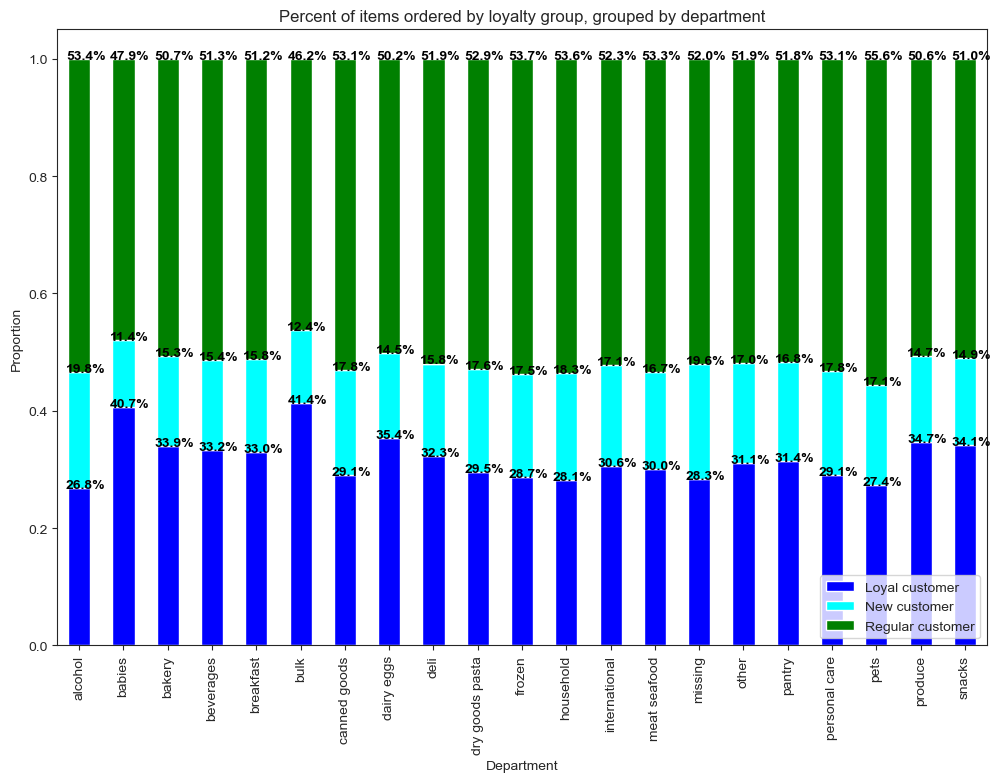

In [132]:
#Normalized bar chart of items ordered by loyalty group, grouped by department
bar_norm_dept_loyalty = crosstab_dept_loyal_n.plot( kind ='bar',
                                                stacked = True,
                                                color = ('Blue', 'Cyan', 'Green'),
                                                figsize = (12, 8))
 
plt.title('Percent of items ordered by loyalty group, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_loyal_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_loyal_n.loc[x],
                                   crosstab_dept_loyal_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()

In [133]:
bar_norm_dept_loyalty.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_loyalty'))

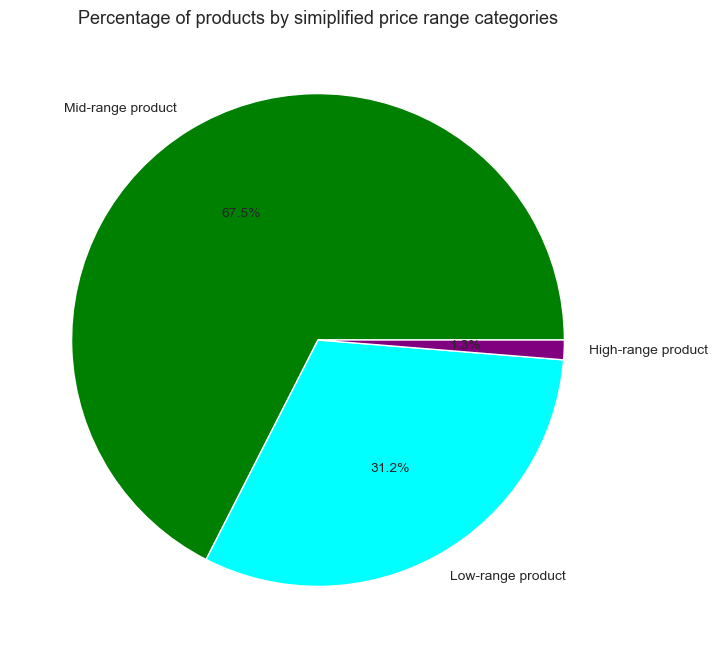

In [134]:
# Simplified Price Range Visualization
pie_price_range = df_combo['price_range_loc'].value_counts().plot.pie(figsize = (8,8), 
                                                                       colors = ('Green', 'Cyan', 'Purple'),
                                                                       autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of products by simiplified price range categories',fontsize=13)
plt.show()

In [135]:
pie_price_range.figure.savefig(os.path.join(viz_path, 'pie_price_range1'))

In [136]:
# create dataframe with only one instance of each product_id
df_one_product_id = df_combo.drop_duplicates(subset = ["product_id"])

In [137]:
#crosstab departments and price_range_loc with unique product id- normalized
crosstab_dept_price_range1_n = pd.crosstab(index = df_one_product_id['department'], 
                                           columns = df_one_product_id['price_range_loc'], 
                                           normalize = 'index')

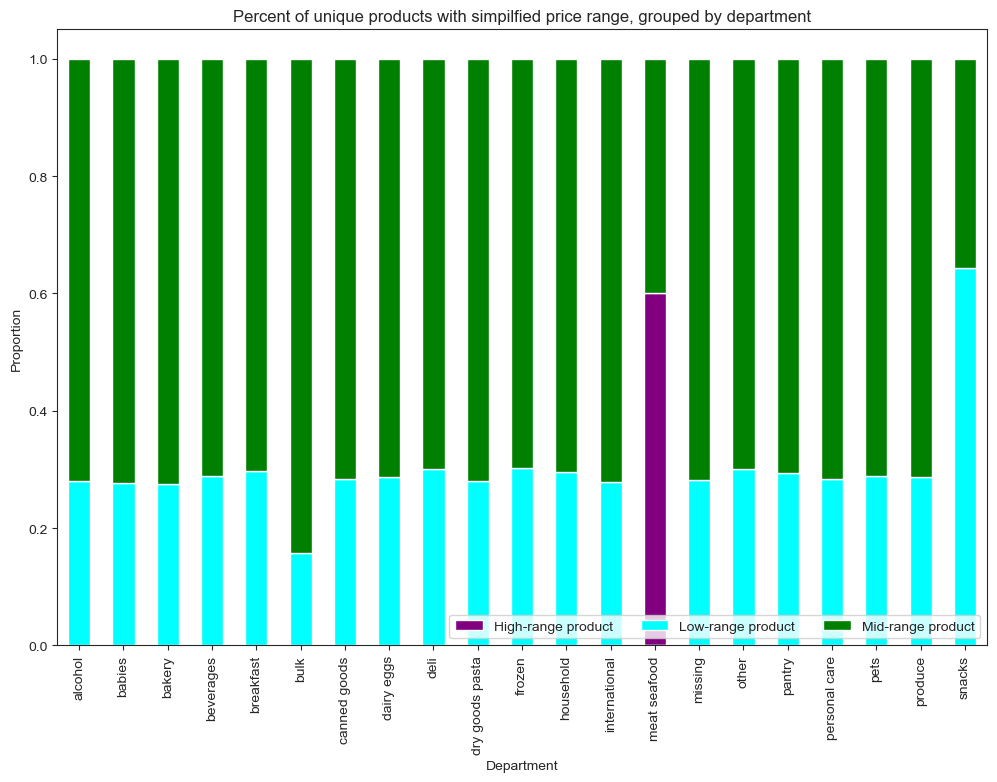

In [138]:
#Normalized bar chart of simplified price ranges, grouped by department, unique product id
bar_norm_dept_price_range1 = crosstab_dept_price_range1_n.plot( kind ='bar',
                                                                stacked = True,
                                                                color = ('Purple', 'Cyan', 'Green'),
                                                                figsize = (12, 8))
 
plt.title('Percent of unique products with simpilfied price range, grouped by department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')
plt.show()

In [139]:
bar_norm_dept_price_range1.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_price_range1'))

In [140]:
# crosstab diet_style with income_group to determine if income may be affecting purchasing patterns
cross_income_diet = pd.crosstab(index = df_combo['vegan_profile'], 
                                    columns = df_combo['income_group'], 
                                    normalize = 'index')
cross_income_diet

income_group,025-75k,075-125k,125k+
vegan_profile,,,
Non-vegan,0.316947,0.414506,0.268547
Vegan,0.618045,0.235376,0.146579


In [141]:
#comparing pet ownership and income groups
crosstab_dept_pet_3 = pd.crosstab(index = df_combo['income_group'], 
                                         columns = df_combo['pet_profile'], 
                                         normalize = 'index')
crosstab_dept_pet_3

pet_profile,No pet,Pet owner
income_group,,
025-75k,0.899638,0.100362
075-125k,0.888559,0.111441
125k+,0.875325,0.124675


In [142]:
#comparing pet ownership and order frequency groups
crosstab_pet_freq = pd.crosstab(index = df_combo['pet_profile'], 
                                        columns = df_combo['order_frequency_flag'],
                                        normalize = 'index')
crosstab_pet_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
pet_profile,,,
No pet,0.680311,0.096768,0.222921
Pet owner,0.720053,0.067335,0.212612


In [143]:
#The average price per item is highest on day 0 and 6, what departments have the most orders each day? 
#crosstab departments and Orders per day- normalized
crosstab_dept_orders_n = pd.crosstab(index = df_combo['order_dow'], 
                                    columns = df_combo['department'], 
                                    normalize = 'index')
crosstab_dept_orders_n.to_clipboard()